In [1]:
import numpy as np
import statsmodels.formula.api as smf
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(414) #something you need to create test data set

X = np.linspace(0, 15, 1000) #sets x data set from 0 to 15 with a thousand entries
y = 3*np.sin(X) + np.random.normal(1 + X, .2, 1000) #sets a related y set



In [2]:
train_X, train_y = X[:700], y[:700] #slices x and y at the 700th number
test_X, test_y = X[700:], y[700:] #same as above

train_df = pd.DataFrame({'X': train_X, 'y': train_y})
test_df = pd.DataFrame({'X': test_X, 'y': test_y})

In [4]:
%matplotlib inline
#linear
poly_1 = smf.ols(formula='y ~ 1 + X', data=train_df).fit()
pred = poly_1.predict(test_df)
actual = np.array(test_df['y'].tolist())

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(actual,pred)
mse

6.5475412744609836

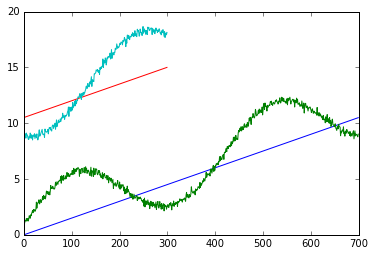

In [5]:
plt.plot(train_df)
plt.plot(test_df)
plt.show()

In [6]:
#quadratic
poly_2 = smf.ols(formula='y ~ 1 + X + I(X**2)', data=train_df).fit()
pred2 = poly_2.predict(test_df)
mse = mean_squared_error(actual,pred2)
mse

7.9873829450136631

These mean square error seem both too low, and they shouldnt be exactly the same. So what am I doing wrong?

In [7]:
poly_3 = smf.ols(formula = 'y ~ 1 + X + I(X**2) + I(X**3)', data=train_df).fit()
pred3 = poly_3.predict(test_df)
mean_squared_error(actual, pred3)


199.65481044433017